In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/electron drift

/Users/austinmcdonald/Desktop/data/electron drift


In [3]:
alldata = None
alldata = []
for files in glob.glob("*.csv"):
    alldata.append(files)
#alldata

In [4]:
data = dict()
area= dict()
area1hold = dict()
area2hold = dict()

adata = dict()
intensity = dict()
leng = len(alldata)
for x in range(0,leng):
    data[x] = pd.read_csv(alldata[x],delimiter=",",names = ['1','2','3','time','voltage'],skiprows=0,skipfooter=0,engine='python')
   
    adata[x] = data[x][(data[x]['time']>5e-5) ]
    

    area[x] = integrate.trapz(adata[x]['voltage'], adata[x]['time'])


    #data[x]['dif'] = data[x]['sig'].diff().abs()
    #data[x]['BS'] = (data[x]['sig']-backg['sig'])
    #dataf[x] = data[x][data[x]['dif']<.02]
    #datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]

In [79]:
tst = [data[0]['voltage'],data[1]['voltage'],data[2]['voltage']]
test= pd.concat(tst,axis=1)
#test.std(axis=1)
#test.mean(axis=1)
#

In [ ]:
plt.plot(adata[0]['time'],adata[0]['voltage'].rolling(center=False,window=300).mean())
plt.xlim(-1e-4,5e-4)
plt.ylim(-.02,.02)
plt.axvline(0.000159, color='g', linestyle='-')

plt.show()

adata[0]['voltage'].idxmin()
adata[0]['time'].loc[[85340]]

In [69]:
areas = []
for x in range(0,leng):
    areas.append(area[x])
areas=np.array(areas)
meanarea  = float(sum(areas))/len(areas)   
SDarea  = np.std(areas)
print('Mean Area =',meanarea)
print('SD =',SDarea)

Mean Area = -1.1639244419707315e-06
SD = 1.74474478547e-07


In [51]:
meanarea  = float(sum(areas))/len(areas)   
SDarea  = np.std(areas)

array([ -1.06104746e-06,  -8.45309532e-07,  -8.23159981e-07,
        -1.02074493e-06,  -1.01224003e-06,  -1.23659320e-06,
        -1.03184697e-06,  -1.19871975e-06,  -9.71752902e-07,
        -9.89686648e-07,  -1.14969079e-06,  -1.05946847e-06,
        -9.77230093e-07,  -1.04922887e-06,  -9.83713053e-07,
        -1.14164345e-06,  -1.02304145e-06,  -1.17746282e-06,
        -1.02881341e-06,  -1.14702104e-06,  -1.12522725e-06,
        -1.05093900e-06,  -1.02138081e-06,  -3.78197755e-07,
        -8.38806105e-07,  -8.37588199e-07,  -1.24964371e-06,
        -1.02486696e-06,  -1.25694369e-06,  -1.25154154e-06,
        -1.25736484e-06,  -1.29304669e-06,  -1.05527328e-06,
        -9.65586959e-07,  -9.76578168e-07,  -1.02392611e-06,
        -1.07409237e-06,  -1.07140746e-06,  -1.10339119e-06,
        -1.11094995e-06,  -1.16315206e-06,  -1.30641426e-06,
        -1.24196728e-06,  -1.09865784e-06,  -1.17360433e-06,
        -1.40353133e-06,  -1.27373343e-06,  -1.26434316e-06,
        -1.29237601e-06,

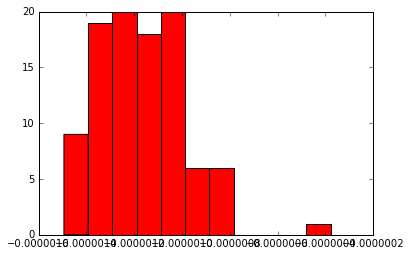

In [67]:

plt.hist(areas,11, color='r')

plt.show()

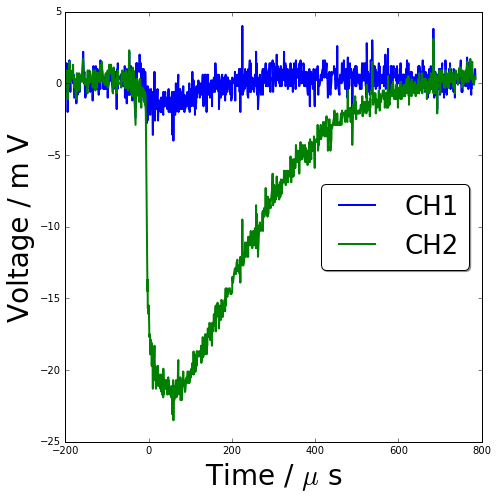

In [7]:
plt.figure(figsize=(7,7))

plt.plot(dataf[0]['Time']*1e6,dataf[0]['CH1']*1e3,label= 'CH1',linewidth=2)
plt.plot(dataf[0]['Time']*1e6,dataf[0]['CH2']*1e3,label= 'CH2',linewidth=2)

plt.xlabel(r'Time / $\mu$ s', fontsize=28)
plt.ylabel('Voltage / m V', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='center right',fontsize=26,shadow=True, fancybox=True)
#plt.xticks(fontsize = 26)
#plt.yticks(fontsize = 26)
#plt.xticks([450,475,500,525,550,575,600,625],ha='left')
#plt.tick_params(top="off",right='off')
#plt.tick_params(axis='x', direction='out',width=2,length=5)
##plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(-200,800)
#plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_Fluo4_ca_IF.pdf')
plt.show()
